## Importar librerias

In [2]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## Carga de datos

In [3]:
# 1) Cargar y concatenar todos los archivos .sav de la carpeta 'data/violencia-intrafamiliar'
base_path = Path('../data/violencia-intrafamiliar')
sav_files = sorted(list(base_path.glob('*.sav')))
print(f'Archivos encontrados: {len(sav_files)}')
dfs = []
metadatas = {}
for p in sav_files:
   try:
      df, meta = pyreadstat.read_sav(p)
      year = p.stem.split('-')[0] if '-' in p.stem else p.stem
      df = df.copy()
      df['__source_year'] = year
      dfs.append(df)
      metadatas[year] = meta
      print(f'Leido: {p.name} -> shape {df.shape}')
   except Exception as e:
      print(f'Error leyendo {p}: {e}')

if dfs:
   data = pd.concat(dfs, ignore_index=True, sort=False)
   print('Concatenación completa. Shape total:', data.shape)
else:
   data = pd.DataFrame()
   print('No se cargó ningún archivo.')

Archivos encontrados: 12
Leido: 2009-intrafamiliar.sav -> shape (31497, 47)
Leido: 2010-intrafamiliar.sav -> shape (32017, 47)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido: 2019-intrafamiliar.sav -> shape (31898, 73)
Leido: 2020-intrafamiliar.sav -> shape (28259, 73)
Concatenación completa. Shape total: (387257, 75)


# Análisis Exploratorio de Datos - Violencia Intrafamiliar

Este notebook contiene un análisis exploratorio completo de los datos de violencia intrafamiliar en Guatemala (2009-2020). El objetivo es explorar los datos, encontrar patrones y formular preguntas de investigación interesantes.

## 1a) Descripción del Conjunto de Datos

En esta sección describimos el dataset: número de variables, observaciones y el tipo de cada variable.

In [4]:
# INCISO 1A) DESCRIPCIÓN DEL CONJUNTO DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

# Veamos las primeras filas para entender los datos
print("\n" + "="*60)
print("PRIMERAS 8 FILAS DEL DATASET")
print("="*60)
data.head(8)

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

PRIMERAS 8 FILAS DEL DATASET


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
0,2009.0,1.0,20.0,101.0,1.0,2.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,1.0,8.0,201.0,3.0,1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009.0,1.0,12.0,201.0,1.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009.0,1.0,6.0,204.0,2.0,2.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009.0,1.0,6.0,204.0,2.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009.0,1.0,2.0,206.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009.0,1.0,18.0,1201.0,1.0,2.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009.0,1.0,18.0,1504.0,1.0,1.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# INCISO 1A) - ANÁLISIS DE TIPOS DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

print("\n" + "="*60)
print("TIPOS DE DATOS DE CADA VARIABLE")
print("="*60)

# Información básica de tipos de datos
print("Información de tipos de datos:")
print(data.dtypes)

print("\n" + "="*60)
print("RESUMEN DE TIPOS DE DATOS")
print("="*60)
print(data.dtypes.value_counts())

print("\n" + "="*60)
print("ANÁLISIS DE VALORES NULOS")
print("="*60)

# Creamos un resumen detallado de cada variable
resumen_variables = pd.DataFrame({
    'Tipo_Dato': data.dtypes,
    'Valores_No_Nulos': data.count(),
    'Valores_Nulos': data.isnull().sum(),
    'Porcentaje_Nulos': (data.isnull().sum() / len(data) * 100).round(2),
    'Valores_Unicos': data.nunique()
})

print("Resumen completo de variables:")
display(resumen_variables)

print("\n" + "="*60)
print("VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS")
print("="*60)

# Verificamos específicamente TOTAL_HIJOS
print("Análisis detallado de TOTAL_HIJOS:")
print(f"  - Tipo de dato: {data['TOTAL_HIJOS'].dtype}")
print(f"  - Total registros: {len(data):,}")
print(f"  - Valores no nulos: {data['TOTAL_HIJOS'].count():,}")
print(f"  - Valores nulos: {data['TOTAL_HIJOS'].isnull().sum():,}")
print(f"  - Porcentaje no nulos: {(data['TOTAL_HIJOS'].count() / len(data) * 100):.1f}%")

# Veamos algunos valores reales (no nulos)
valores_reales = data['TOTAL_HIJOS'].dropna()
if len(valores_reales) > 0:
    print(f"  - Valores únicos: {valores_reales.nunique()}")
    print(f"  - Rango: {valores_reales.min()} - {valores_reales.max()}")
    print(f"  - Primeros 10 valores reales: {valores_reales.head(10).tolist()}")

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

TIPOS DE DATOS DE CADA VARIABLE
Información de tipos de datos:
ANO_EMISION         float64
MES_EMISION         float64
DIA_EMISION         float64
DEPTO_MCPIO         float64
QUIEN_REPORTA       float64
                     ...   
ARTICULOTRAS2       float64
ARTICULOTRAS3       float64
ARTICULOTRAS4       float64
ORGANISMO_REMITE    float64
filter_$            float64
Length: 75, dtype: object

RESUMEN DE TIPOS DE DATOS
float64    73
object      2
Name: count, dtype: int64

ANÁLISIS DE VALORES NULOS
Resumen completo de variables:


,Tipo_Dato,Valores_No_Nulos,Valores_Nulos,Porcentaje_Nulos,Valores_Unicos
ANO_EMISION,float64,387257,0,0.00,12
MES_EMISION,float64,387257,0,0.00,12
DIA_EMISION,float64,387257,0,0.00,31
DEPTO_MCPIO,float64,387257,0,0.00,339
QUIEN_REPORTA,float64,387257,0,0.00,4
...,...,...,...,...,...
ARTICULOTRAS2,float64,413,386844,99.89,3
ARTICULOTRAS3,float64,413,386844,99.89,2
ARTICULOTRAS4,float64,413,386844,99.89,2
ORGANISMO_REMITE,float64,64203,323054,83.42,20



VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS
Análisis detallado de TOTAL_HIJOS:
  - Tipo de dato: float64
  - Total registros: 387,257
  - Valores no nulos: 385,519
  - Valores nulos: 1,738
  - Porcentaje no nulos: 99.6%
  - Valores únicos: 21
  - Rango: 0.0 - 99.0
  - Primeros 10 valores reales: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 1b) Resumen de variables numericas

Realicen un resumen de las variables numéricas e investiguen si siguen una
distribución normal, si no es así expliquen la distribución que pueden presentar.
Para las variables categóricas obtengan una tabla de frecuencia, documenten lo
que vayan encontrando.

In [6]:
# INCISO 1B) RESUMEN DE VARIABLES NUMÉRICAS Y DISTRIBUCIÓN NORMAL

# Primero identificamos las variables numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("="*60)
print("VARIABLES NUMÉRICAS IDENTIFICADAS")
print("="*60)
print(f"Total de variables numéricas: {len(variables_numericas)}")
for i, var in enumerate(variables_numericas, 1):
   print(f"  {i}. {var}")

# Estadísticas descriptivas básicas
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

estadisticas_desc = data[variables_numericas].describe()
print("Estadísticas básicas (mean, std, min, max, percentiles):")
display(estadisticas_desc)

# Agregamos algunas estadísticas adicionales útiles
print("\n" + "="*60)
print("ESTADÍSTICAS ADICIONALES")
print("="*60)

estadisticas_extra = pd.DataFrame({
   'Media': data[variables_numericas].mean(),
   'Mediana': data[variables_numericas].median(),
   'Moda': data[variables_numericas].mode().iloc[0] if len(data[variables_numericas].mode()) > 0 else None,
   'Desviacion_Std': data[variables_numericas].std(),
   'Varianza': data[variables_numericas].var(),
   'Asimetria': data[variables_numericas].skew(),
   'Curtosis': data[variables_numericas].kurtosis(),
   'Rango': data[variables_numericas].max() - data[variables_numericas].min()
})

display(estadisticas_extra)

VARIABLES NUMÉRICAS IDENTIFICADAS
Total de variables numéricas: 73
  1. ANO_EMISION
  2. MES_EMISION
  3. DIA_EMISION
  4. DEPTO_MCPIO
  5. QUIEN_REPORTA
  6. VIC_SEXO
  7. VIC_EDAD
  8. TOTAL_HIJOS
  9. NUM_HIJ_HOM
  10. NUM_HIJ_MUJ
  11. VIC_ALFAB
  12. VIC_ESCOLARIDAD
  13. VIC_EST_CIV
  14. VIC_GRUPET
  15. VIC_NACIONAL
  16. VIC_TRABAJA
  17. VIC_OCUP
  18. VIC_DEDICA
  19. VIC_DISC
  20. TIPO_DISCAQ
  21. VIC_REL_AGR
  22. OTRAS_VICTIMAS
  23. VIC_OTRAS_HOM
  24. VIC_OTRAS_MUJ
  25. VIC_OTRAS_N_OS
  26. VIC_OTRAS_N_AS
  27. HEC_DIA
  28. HEC_MES
  29. HEC_ANO
  30. HEC_DEPTOMCPIO
  31. HEC_AREA
  32. HEC_TIPAGRE
  33. HEC_RECUR_DENUN
  34. INST_DONDE_DENUNCIO
  35. AGR_SEXO
  36. AGR_EDAD
  37. AGR_ALFAB
  38. AGR_ESCOLARIDAD
  39. AGR_EST_CIV
  40. AGR_GURPET
  41. AGR_NACIONAL
  42. AGR_TRABAJA
  43. AGR_OCUP
  44. AGR_DEDICA
  45. INST_DENUN_HECHO
  46. MEDIDAS_SEGURIDAD
  47. AGR_GRUPET
  48. LEY_APLICABLE
  49. AGRESORES_OTROS_TOTAL
  50. AGR_OTROS_HOM
  51. AGR_OTRAS_MUJ
  

,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
count,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,385519.000000,385519.000000,385519.000000,...,798.000000,798.000000,798.000000,798.000000,413.000000,413.000000,413.000000,413.000000,64203.000000,29988.000000
mean,2014.361734,6.409831,15.332136,970.043643,1.124305,1.896330,33.506604,18.529429,17.651509,17.588446,...,664.269424,546.273183,524.973684,524.537594,988.690073,988.280872,986.905569,986.905569,36.262511,0.000033
std,3.392050,3.381359,8.747814,650.129646,0.887118,0.304833,14.460042,36.305425,36.679061,36.701557,...,365.303451,480.323780,498.804333,499.184967,93.255994,97.147963,109.384790,109.384790,36.677530,0.005775
min,2009.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,141.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011.000000,4.000000,8.000000,312.000000,1.000000,2.000000,24.000000,1.000000,0.000000,0.000000,...,215.000000,0.000000,0.000000,0.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
50%,2014.000000,6.000000,15.000000,1005.000000,1.000000,2.000000,30.000000,2.000000,1.000000,1.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
75%,2017.000000,9.000000,23.000000,1601.000000,1.000000,2.000000,39.000000,4.000000,3.000000,3.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,0.000000
max,2020.000000,12.000000,31.000000,2217.000000,9.000000,2.000000,99.000000,99.000000,99.000000,99.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,1.000000



ESTADÍSTICAS ADICIONALES


,Media,Mediana,Moda,Desviacion_Std,Varianza,Asimetria,Curtosis,Rango
ANO_EMISION,2014.361734,2014.0,2013.0,3.392050,11.506003,0.069038,-1.177745,11.0
MES_EMISION,6.409831,6.0,7.0,3.381359,11.433588,0.029698,-1.171984,11.0
DIA_EMISION,15.332136,15.0,3.0,8.747814,76.524258,0.054975,-1.193510,30.0
DEPTO_MCPIO,970.043643,1005.0,101.0,650.129646,422668.556607,0.135120,-1.184881,2116.0
QUIEN_REPORTA,1.124305,1.0,1.0,0.887118,0.786979,8.404419,71.155560,8.0
...,...,...,...,...,...,...,...,...
ARTICULOTRAS2,988.280872,999.0,999.0,97.147963,9437.726745,-9.015717,80.084243,999.0
ARTICULOTRAS3,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ARTICULOTRAS4,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ORGANISMO_REMITE,36.262511,17.0,17.0,36.677530,1345.241171,1.087958,-0.720542,98.0


In [7]:
# CONTINUACIÓN INCISO 1B) - PRUEBA DE NORMALIDAD

print("="*60)
print("PRUEBA DE NORMALIDAD (SHAPIRO-WILK)")
print("="*60)
print("H0: Los datos siguen una distribución normal")
print("Si p-valor < 0.05, rechazamos H0 (NO es normal)")
print("="*60)

resultados_normalidad = []

for col in variables_numericas:
   # Tomamos una muestra de 5000 datos (límite de Shapiro-Wilk)
   muestra = data[col].dropna()
   if len(muestra) > 5000:
      muestra = muestra.sample(5000, random_state=42)
   
   if len(muestra) > 3:  # Necesitamos al menos 3 datos
      stat, p_valor = stats.shapiro(muestra)
      es_normal = "Sí" if p_valor > 0.05 else "No"
      
      # Calculamos asimetría y curtosis para entender la distribución
      asimetria = data[col].skew()
      curtosis = data[col].kurtosis()
      
      resultados_normalidad.append({
         'Variable': col,
         'Estadístico': round(stat, 4),
         'P-valor': round(p_valor, 6),
         'Es_Normal': es_normal,
         'Asimetría': round(asimetria, 3),
         'Curtosis': round(curtosis, 3)
      })

df_normalidad = pd.DataFrame(resultados_normalidad)
display(df_normalidad)

# Interpretación de las distribuciones
print("\n" + "="*60)
print("INTERPRETACIÓN DE LAS DISTRIBUCIONES")
print("="*60)

for _, row in df_normalidad.iterrows():
   print(f"\n Variable: {row['Variable']}")
   print(f"   - Es normal: {row['Es_Normal']}")
   
   # Interpretamos la asimetría
   if row['Asimetría'] > 0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la DERECHA (cola larga hacia valores altos)")
   elif row['Asimetría'] < -0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)")
   else:
      print(f"   - Asimetría ({row['Asimetría']}): Aproximadamente SIMÉTRICA")
   
   # Interpretamos la curtosis
   if row['Curtosis'] > 1:
      print(f"   - Curtosis ({row['Curtosis']}): LEPTOCÚRTICA (pico alto, colas pesadas)")
   elif row['Curtosis'] < -1:
      print(f"   - Curtosis ({row['Curtosis']}): PLATICÚRTICA (pico bajo, colas ligeras)")
   else:
      print(f"   - Curtosis ({row['Curtosis']}): MESOCÚRTICA (similar a normal)")

PRUEBA DE NORMALIDAD (SHAPIRO-WILK)
H0: Los datos siguen una distribución normal
Si p-valor < 0.05, rechazamos H0 (NO es normal)


,Variable,Estadístico,P-valor,Es_Normal,Asimetría,Curtosis
0,ANO_EMISION,0.9443,0.0,No,0.069,-1.178
1,MES_EMISION,0.9462,0.0,No,0.030,-1.172
2,DIA_EMISION,0.9511,0.0,No,0.055,-1.194
3,DEPTO_MCPIO,0.9303,0.0,No,0.135,-1.185
4,QUIEN_REPORTA,0.1223,0.0,No,8.404,71.156
...,...,...,...,...,...,...
68,ARTICULOTRAS2,0.0842,0.0,No,-9.016,80.084
69,ARTICULOTRAS3,0.0834,0.0,No,-8.955,78.575
70,ARTICULOTRAS4,0.0834,0.0,No,-8.955,78.575
71,ORGANISMO_REMITE,0.6344,0.0,No,1.088,-0.721



INTERPRETACIÓN DE LAS DISTRIBUCIONES

 Variable: ANO_EMISION
   - Es normal: No
   - Asimetría (0.069): Aproximadamente SIMÉTRICA
   - Curtosis (-1.178): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: MES_EMISION
   - Es normal: No
   - Asimetría (0.03): Aproximadamente SIMÉTRICA
   - Curtosis (-1.172): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DIA_EMISION
   - Es normal: No
   - Asimetría (0.055): Aproximadamente SIMÉTRICA
   - Curtosis (-1.194): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DEPTO_MCPIO
   - Es normal: No
   - Asimetría (0.135): Aproximadamente SIMÉTRICA
   - Curtosis (-1.185): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: QUIEN_REPORTA
   - Es normal: No
   - Asimetría (8.404): Sesgada a la DERECHA (cola larga hacia valores altos)
   - Curtosis (71.156): LEPTOCÚRTICA (pico alto, colas pesadas)

 Variable: VIC_SEXO
   - Es normal: No
   - Asimetría (-2.6): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)
   - Curtosis (4.762): LEPTOC

VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS


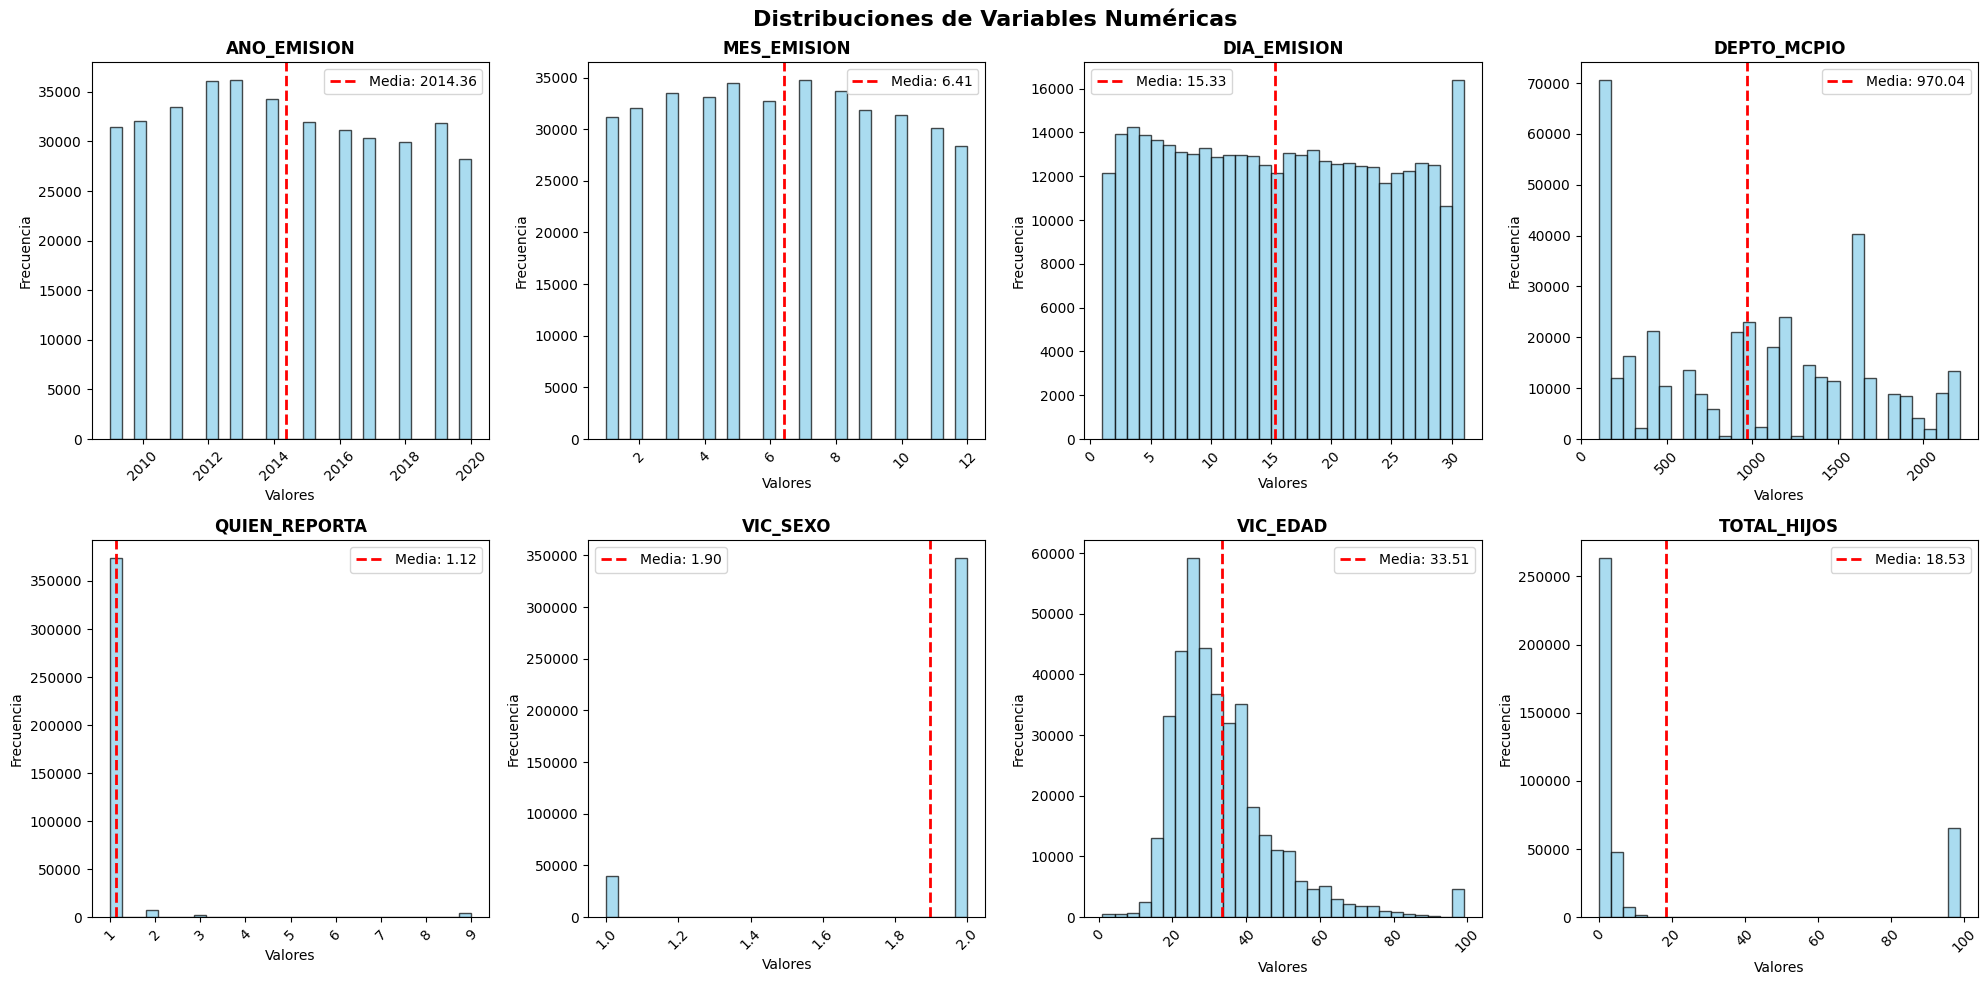


RESUMEN DE DISTRIBUCIONES OBSERVADAS

 ANO_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.069, Curtosis=-1.178

 MES_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.03, Curtosis=-1.172

 DIA_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.055, Curtosis=-1.194

 DEPTO_MCPIO:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.135, Curtosis=-1.185

 QUIEN_REPORTA:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=8.404, Curtosis=71.156

 VIC_SEXO:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la izquierda
   ── Interpretación: Asimetría=-2.6, Curtosis=4.762

 VIC_EDAD:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=1.787, Curtosis=4.657

 TOTAL_HIJOS:
 

In [8]:
# CONTINUACIÓN INCISO 1B) - HISTOGRAMAS DE VARIABLES NUMÉRICAS

print("="*60)
print("VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS")
print("="*60)

# Configuramos el estilo de los gráficos
plt.style.use('default')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

# Aplanamos los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
   if i < len(axes):
      # Filtramos valores no nulos
      datos_limpios = data[col].dropna()
      
      # Creamos el histograma
      axes[i].hist(datos_limpios, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
      axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Valores')
      axes[i].set_ylabel('Frecuencia')
      
      # Añadimos línea de la media
      media = datos_limpios.mean()
      axes[i].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
      axes[i].legend()
      
      # Rotamos etiquetas si es necesario
      axes[i].tick_params(axis='x', rotation=45)

# Ocultamos ejes vacíos si hay menos de 8 variables
for j in range(len(variables_numericas), len(axes)):
   axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Interpretación breve de cada distribución
print("\n" + "="*60)
print("RESUMEN DE DISTRIBUCIONES OBSERVADAS")
print("="*60)

for _, row in df_normalidad.iterrows():
   var = row['Variable']
   print(f"\n {var}:")
   print(f"   ── Normal: {row['Es_Normal']}")
   
   # Interpretación basada en asimetría
   if row['Asimetría'] > 1:
      print(f"   ── Distribución: Fuertemente sesgada a la derecha")
   elif row['Asimetría'] > 0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la derecha")
   elif row['Asimetría'] < -1:
      print(f"   ── Distribución: Fuertemente sesgada a la izquierda")
   elif row['Asimetría'] < -0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la izquierda")
   else:
      print(f"   ── Distribución: Aproximadamente simétrica")

   print(f"   ── Interpretación: Asimetría={row['Asimetría']}, Curtosis={row['Curtosis']}")